In [9]:
import numpy as np

# parameter(have to set by yourself)
grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# start, finish 위치 랜덤 생성 + 블럭위치에는 생성 안되게 + start, finish가 같지 않게
start = None
finish = None

while start is None or grid[start] == -1 or finish is None or grid[finish] == -1 or finish == start:
    start = (np.random.randint(9), np.random.randint(7))
    finish = (np.random.randint(9), np.random.randint(7))

dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

to_right = (0,1)


def blue(current, finish, grid, path):
    candidate = []

    current = (current[0], current[1]-1)
    candidate.append(current)

    return candidate



def purple(current, finish, grid, path):
    temp_candidate = []
    distances = []

    # start가 purple grid에 있을 때, 일단 모든 candidate 고려
    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0]) + abs(ny - finish[1]))

    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



def green(current, finish, grid, path):
    temp_candidate = []
    distances = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0])+abs(ny - finish[1]))
                
    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



# 무조건 갈래길 다 candidate
def orange(current, finish, grid, path):
    candidate = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                candidate.append((nx, ny))
    
    return candidate




# 1. 밟았던건 안밟게. path 리스트 활용
# 2. 추후 if current == 왼쪽 가장자리 쪽 or 교차로 등이면 소요시간 변화 등 속성
# 3. 
def move(current, finish, grid, path, route):
    print('current : ', current)

    path.append(current)
    print('path : ', path)

    color = grid[current[0], current[1]]
    print('color : ', color)
    if color == 1:
        candidate = blue(current, finish, grid, path)
    elif color == 2:
        candidate = purple(current, finish, grid, path)
    elif color == 3:
        candidate = green(current, finish, grid, path)
    elif color == 4:
        candidate = orange(current, finish, grid, path)
    else:
        print('Invalid color. terminating.')
        return
    print('candidate : ', candidate)

    # 갈곳 없으면 종료
    if len(candidate) == 0 :
        print('This path is dead end.', 'path : ', path)
        return

    # candidate 방문
    for next_move in candidate:
        if next_move == finish:
            # If next_move is finish, add completed path to route
            print('got finish, completed path : ', path + [next_move]) 
            route.append(path + [next_move])
        else:
            # Continue recursively visiting candidate
            new_path = path.copy()
            move(next_move, finish, grid, new_path, route)

    return

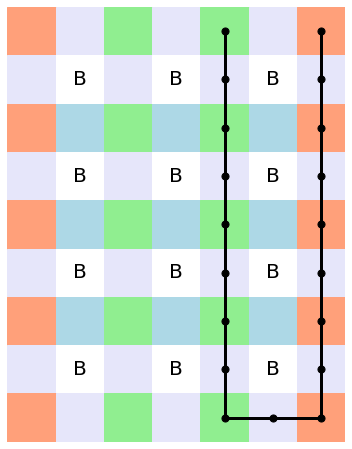

In [10]:
import matplotlib.pyplot as plt

grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# Define the colors for each value
colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

# Define the path
path = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (7, 4), (6, 4), (5, 4), (4, 
4), (3, 4), (2, 4), (1, 4), (0, 4)]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 8))

# Iterate through the grid and plot each cell with the appropriate color
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))  # flip the order of the coordinates
        
        # Add text 'B' on a white background if the coordinate value is -1
        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)
    
    # Add black dots at each coordinate in the path
    for coord in path:
        if coord[0] == i:
            ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)  # flip the order of the coordinates
    
# Connect the dots in the path with a line
x, y = zip(*path)
ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')  # flip the order of the coordinates

# Set the limits and aspect ratio
ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the plot
plt.show()


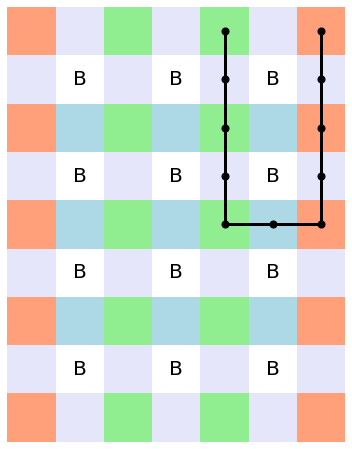

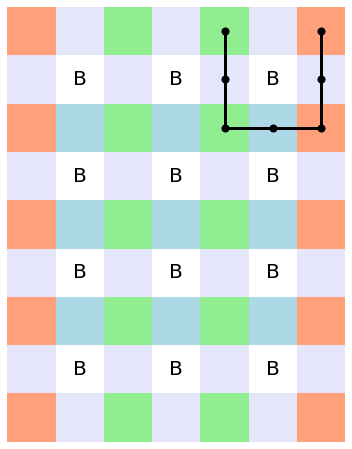

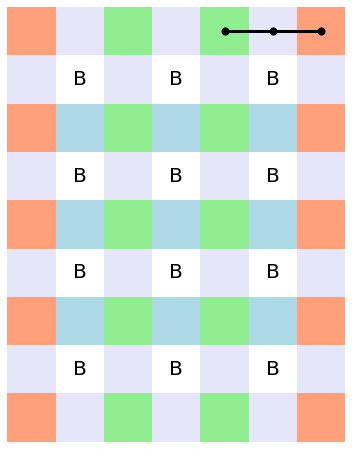

In [14]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4]])

colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

route = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
         [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
         [(0, 6), (0, 5), (0, 4)]]

for path in route:
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i][j]
            color = colors.get(value, 'white')
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

            if value == -1:
                ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
                ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

        for coord in path:
            if coord[0] == i:
                ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)

    x, y = zip(*path)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    plt.show()


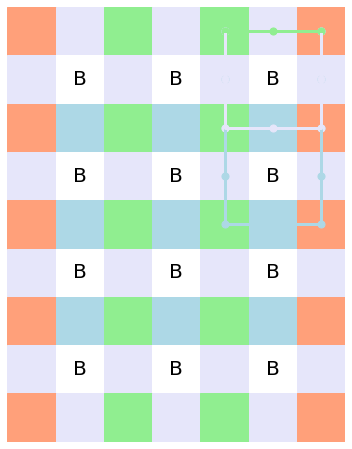

In [15]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color=list(colors.values())[idx])

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=50)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()


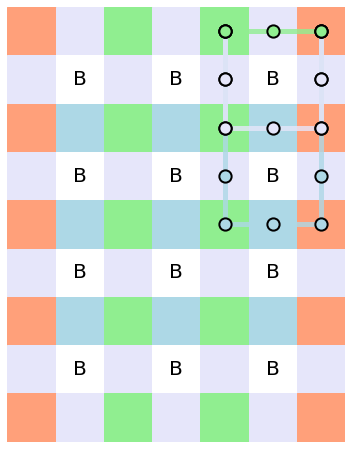

In [16]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=5, color=list(colors.values())[idx], alpha=0.8, zorder=2)

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=150, edgecolors='black', linewidths=2, zorder=3)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()
